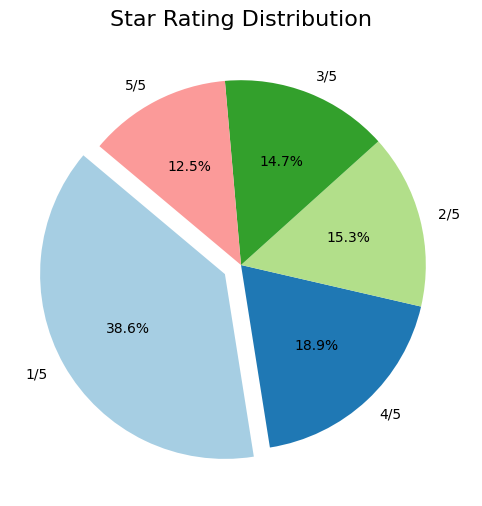

<ipython-input-10-7e4f4267e003>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=['green', 'red'])


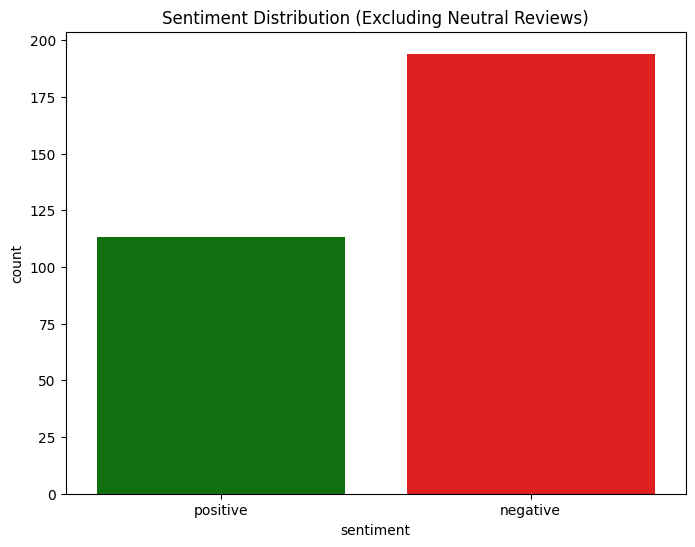

Initial Sentiment Counts (Excluding Neutral Reviews):
sentiment
negative    194
positive    113
Name: count, dtype: int64
Logistic Regression Accuracy: 0.84
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.80      1.00      0.89        39
    positive       1.00      0.57      0.72        23

    accuracy                           0.84        62
   macro avg       0.90      0.78      0.80        62
weighted avg       0.87      0.84      0.83        62

SVM Accuracy: 0.87
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.95      0.90        39
    positive       0.89      0.74      0.81        23

    accuracy                           0.87        62
   macro avg       0.88      0.84      0.86        62
weighted avg       0.87      0.87      0.87        62



<ipython-input-10-7e4f4267e003>:127: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


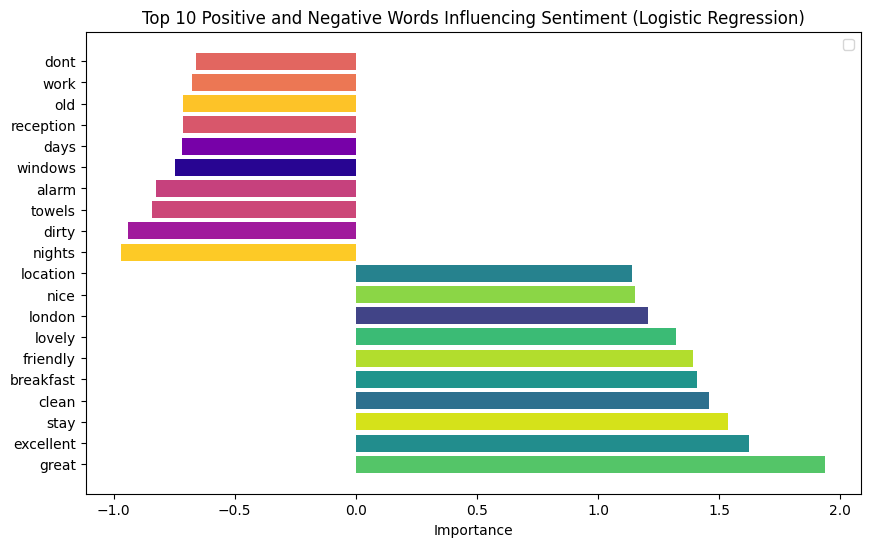

<ipython-input-10-7e4f4267e003>:155: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


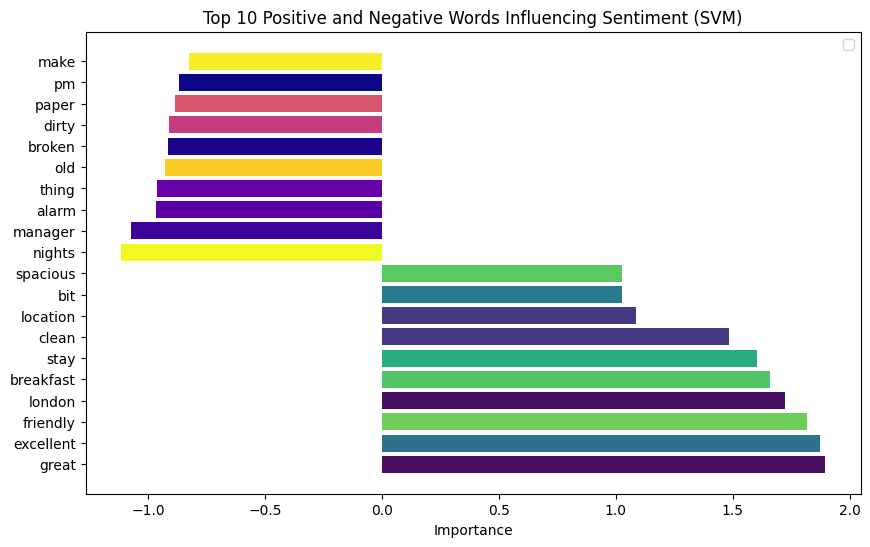


Neutral Reviews Sentiment Classification (Logistic Regression) Before Reintegration:
logreg_predicted_sentiment
negative    36
positive    17
Name: count, dtype: int64

Neutral Reviews Sentiment Classification (SVM) Before Reintegration:
svm_predicted_sentiment
negative    34
positive    19
Name: count, dtype: int64


<ipython-input-10-7e4f4267e003>:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='logreg_predicted_sentiment', data=neutral_reviews, palette=['green', 'red'])


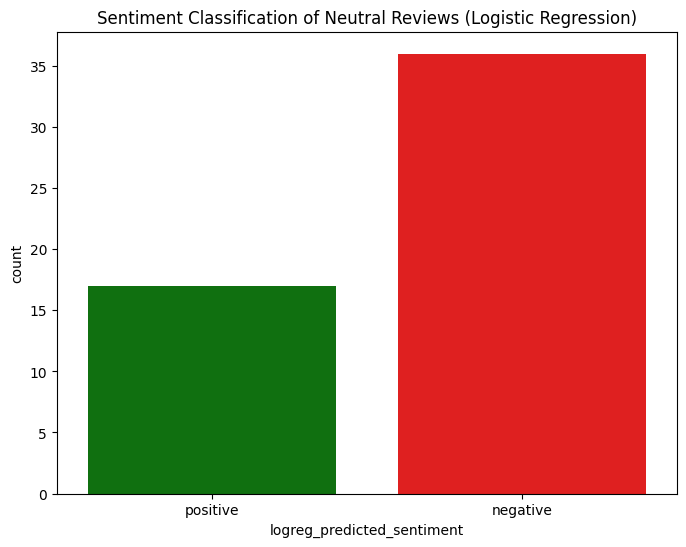

<ipython-input-10-7e4f4267e003>:186: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='svm_predicted_sentiment', data=neutral_reviews, palette=['green', 'red'])


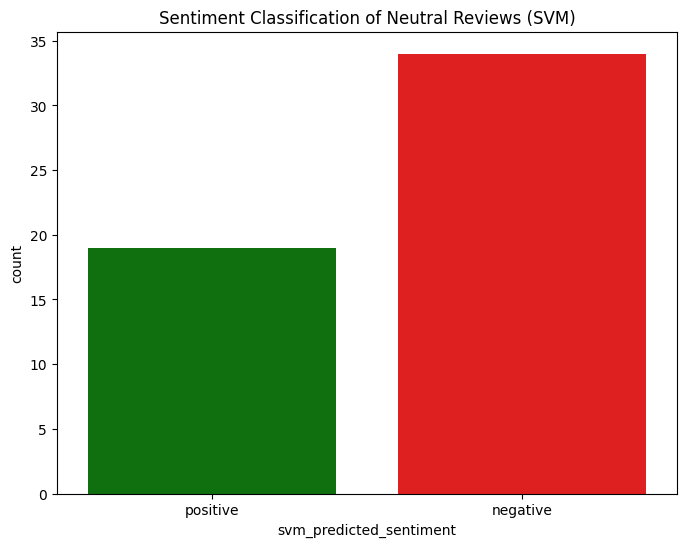

<ipython-input-10-7e4f4267e003>:197: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_with_neutral, palette=['blue', 'orange', 'green'])
<ipython-input-10-7e4f4267e003>:197: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='sentiment', data=df_with_neutral, palette=['blue', 'orange', 'green'])


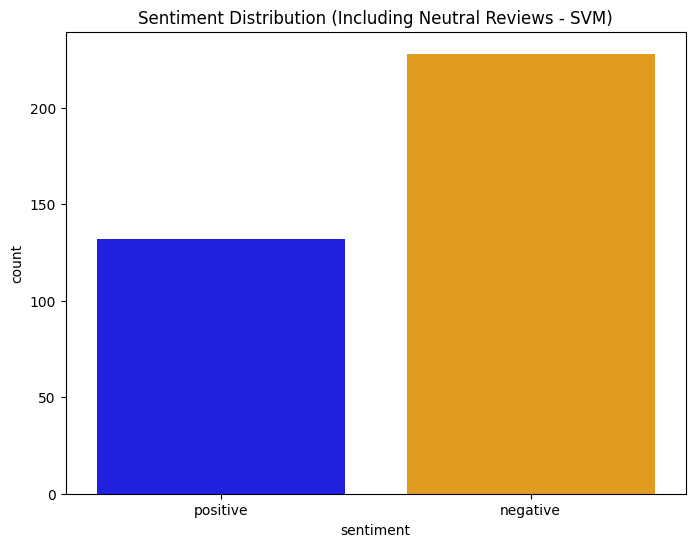


Final Sentiment Counts (Including Neutral Reviews - SVM):
sentiment
negative    228
positive    132
Name: count, dtype: int64


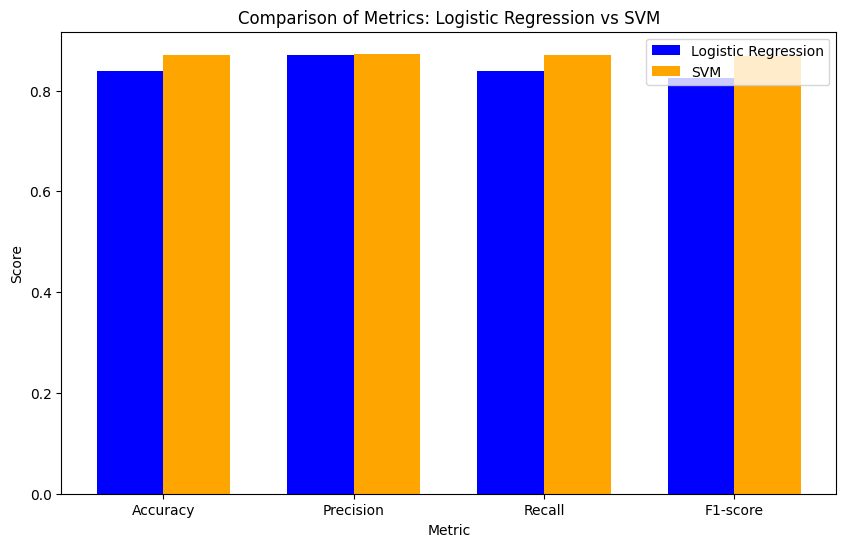

In [10]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df = pd.read_csv('brittania_international_hotel.csv')
if 'rating' in df.columns:
    # count the stars 
    star_counts = df['rating'].value_counts()

    plt.figure(figsize=(8, 6))
    ax = plt.gca()  
    ax.set_facecolor('grey')  
    star_counts.plot.pie(
        autopct='%1.1f%%',  
        startangle=140,    
        colors=plt.cm.Paired.colors,  
        explode=[0.1 if i == star_counts.max() else 0 for i in star_counts],  
        labels=star_counts.index  
    )
    plt.title('Star Rating Distribution', fontsize=16)
    plt.ylabel('') 
    plt.show()
else:
    print("The dataset does not contain a 'rating' column.")
# we create a function for putting a sentinment into the reviews
def label_sentiment(star_rating):
    if star_rating in ['1/5', '2/5']:
        return 'negative'
    elif star_rating in ['4/5', '5/5']:
        return 'positive'
    else:
        return None  # we exclude neutral reviews (3/5) for now

# a function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Clean and preprocess data
df['review'] = df['review'].apply(clean_text)
df['sentiment'] = df['rating'].apply(label_sentiment)

# Separate neutral reviews (3/5) for later classification
neutral_reviews = df[df['sentiment'].isnull()].copy()
df = df.dropna(subset=['sentiment'])


plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=['green', 'red'])
plt.title('Sentiment Distribution (Excluding Neutral Reviews)')
plt.show()


initial_sentiment_counts = df['sentiment'].value_counts()
print("Initial Sentiment Counts (Excluding Neutral Reviews):")
print(initial_sentiment_counts)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
X = tfidf_vectorizer.fit_transform(df['review'])
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train gia Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Train gia SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# we evaluate the  models
logreg_y_pred = logreg_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_y_pred))

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

# Visualizing top important words for sentiment using Logistic Regression
important_words = tfidf_vectorizer.get_feature_names_out()
logreg_important_scores = logreg_model.coef_.flatten()  # Flatten to 1D for sorting

top_words = sorted(zip(logreg_important_scores, important_words), reverse=True)[:10]  # Top 10 positive influencing words
bottom_words = sorted(zip(logreg_important_scores, important_words))[:10]  # Top 10 negative influencing words


top_words_labels = [word for score, word in top_words]
top_words_values = [score for score, word in top_words]
bottom_words_labels = [word for score, word in bottom_words]
bottom_words_values = [score for score, word in bottom_words]


top_words_colors = np.random.rand(len(top_words_labels))
bottom_words_colors = np.random.rand(len(bottom_words_labels))


plt.figure(figsize=(10, 6))


plt.barh(top_words_labels, top_words_values, color=plt.cm.viridis(top_words_colors))
plt.barh(bottom_words_labels, bottom_words_values, color=plt.cm.plasma(bottom_words_colors))
plt.xlabel('Importance')
plt.title('Top 10 Positive and Negative Words Influencing Sentiment (Logistic Regression)')
plt.legend()
plt.show()

svm_important_scores = svm_model.coef_.toarray().flatten()  

top_svm_words = sorted(zip(svm_important_scores, important_words), reverse=True)[:10]  # Top 10 positive influencing words
bottom_svm_words = sorted(zip(svm_important_scores, important_words))[:10]  # Top 10 negative influencing words


top_svm_words_labels = [word for score, word in top_svm_words]
top_svm_words_values = [score for score, word in top_svm_words]
bottom_svm_words_labels = [word for score, word in bottom_svm_words]
bottom_svm_words_values = [score for score, word in bottom_svm_words]

top_svm_words_colors = np.random.rand(len(top_svm_words_labels))
bottom_svm_words_colors = np.random.rand(len(bottom_svm_words_labels))

plt.figure(figsize=(10, 6))

plt.barh(top_svm_words_labels, top_svm_words_values, color=plt.cm.viridis(top_svm_words_colors))


plt.barh(bottom_svm_words_labels, bottom_svm_words_values, color=plt.cm.plasma(bottom_svm_words_colors))

plt.xlabel('Importance')
plt.title('Top 10 Positive and Negative Words Influencing Sentiment (SVM)')
plt.legend()
plt.show()


# For neutral reviews using Logistic Regression and SVM
if not neutral_reviews.empty:
    # Classify neutral reviews using Logistic Regression
    neutral_X = tfidf_vectorizer.transform(neutral_reviews['review'])
    neutral_reviews['logreg_predicted_sentiment'] = logreg_model.predict(neutral_X)

    # Classify neutral reviews using SVM
    neutral_reviews['svm_predicted_sentiment'] = svm_model.predict(neutral_X)

    # Display positive and negative counts for neutral reviews based on Logistic Regression
    logreg_neutral_sentiment_counts = neutral_reviews['logreg_predicted_sentiment'].value_counts()
    print("\nNeutral Reviews Sentiment Classification (Logistic Regression) Before Reintegration:")
    print(logreg_neutral_sentiment_counts)

    # Display positive and negative counts for neutral reviews based on SVM
    svm_neutral_sentiment_counts = neutral_reviews['svm_predicted_sentiment'].value_counts()
    print("\nNeutral Reviews Sentiment Classification (SVM) Before Reintegration:")
    print(svm_neutral_sentiment_counts)

    
    plt.figure(figsize=(8, 6))
    sns.countplot(x='logreg_predicted_sentiment', data=neutral_reviews, palette=['green', 'red'])
    plt.title('Sentiment Classification of Neutral Reviews (Logistic Regression)')
    plt.show()

   
    plt.figure(figsize=(8, 6))
    sns.countplot(x='svm_predicted_sentiment', data=neutral_reviews, palette=['green', 'red'])
    plt.title('Sentiment Classification of Neutral Reviews (SVM)')
    plt.show()

    # Reintegrate neutral reviews into the main dataset based on Logistic Regression predictions
    
    neutral_reviews['sentiment'] = neutral_reviews['svm_predicted_sentiment']  # we chose svm because we see that has better metrics
    df_with_neutral = pd.concat([df, neutral_reviews[['review', 'sentiment']]], ignore_index=True)

    
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=df_with_neutral, palette=['blue', 'orange', 'green'])
    plt.title('Sentiment Distribution (Including Neutral Reviews - SVM)')
    plt.show()

    
    final_sentiment_counts = df_with_neutral['sentiment'].value_counts()
    print("\nFinal Sentiment Counts (Including Neutral Reviews - SVM):")
    print(final_sentiment_counts)

else:
    print("No neutral reviews to classify.")



#  metrics for Logistic Regression
logreg_report = classification_report(y_test, logreg_y_pred, output_dict=True)
logreg_accuracy = logreg_report['accuracy']
logreg_precision = logreg_report['weighted avg']['precision']
logreg_recall = logreg_report['weighted avg']['recall']
logreg_f1 = logreg_report['weighted avg']['f1-score']

#  metrics for SVM
svm_report = classification_report(y_test, svm_y_pred, output_dict=True)
svm_accuracy = svm_report['accuracy']
svm_precision = svm_report['weighted avg']['precision']
svm_recall = svm_report['weighted avg']['recall']
svm_f1 = svm_report['weighted avg']['f1-score']


metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Logistic Regression': [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1]
}

metrics_df = pd.DataFrame(metrics_data)


plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics_df))


plt.bar(index, metrics_df['Logistic Regression'], bar_width, label='Logistic Regression', color='blue')
plt.bar([i + bar_width for i in index], metrics_df['SVM'], bar_width, label='SVM', color='orange')


plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of Metrics: Logistic Regression vs SVM')
plt.xticks([i + bar_width / 2 for i in index], metrics_df['Metric'])
plt.legend()
plt.show()


